In this Notebook, we are going to present the different methods of computing the Value at Risk of an Asset and for a Portfolio:
        * Historical Simulation
        * Variance Covariance
        * Monte Carlo Simulation

In [1]:
# importing the csv file of the pricing and cleaning the data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("daily_data.csv")
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.set_index('Dates')

to_keep = data[data['Soybean']>500].index
value = data.loc[to_keep, 'Soybean'].mean()
data['Soybean'].loc[(data['Soybean']<500)] = pd.np.nan
data['Soybean'] = data['Soybean'].interpolate()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b241b1748>,
      dtype=object)

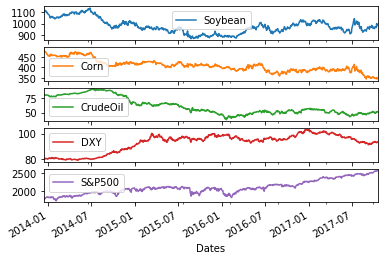

In [2]:
data.plot(subplots=True)

# Single Asset - Value at Risk

We have multiple assets in the DataSet (Soybean, Corn, CrudeOil, DXY and S&P500), in this section we're going to choose only one of these and then we're going to generalize in the following section for a Portfolio.

In [23]:
stock = data['Soybean']
StockReturns = stock.pct_change()
StockReturns = StockReturns.dropna()

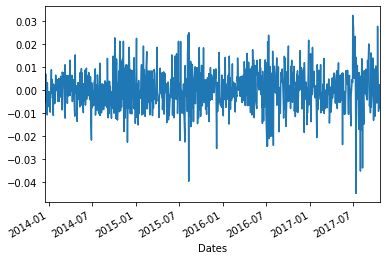

In [24]:
StockReturns.plot()

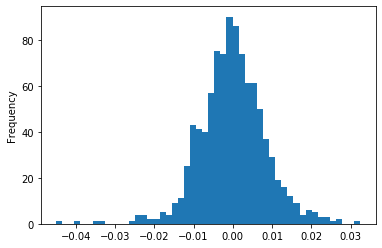

In [25]:
StockReturns.plot.hist(bins = 50)

## Historical Simulation

In [26]:
# Use historical data (minimum 500 day data)
# Compute the % change between each day
# Compute the money impact of the % change
# Sort the results lost -> profit
# Compute the 1 day VaR by choosing the nth value corresponding to the x% confidence interval
# Compute the n day VaR by multiplying the 1 day VaR but sqrt(n)
var_level = 95
var_95 = pd.np.percentile(StockReturns, 100 - var_level)
var_95

-0.012219613562534794

In [27]:
cvar_95 = StockReturns[StockReturns <= var_95].mean()
cvar_95

-0.018702858299680363

## Parametric

In [31]:
from scipy.stats import norm

mu = pd.np.mean(StockReturns)
std = pd.np.std(StockReturns)
confidence_level = 0.05
VaR = norm.ppf(confidence_level, mu, std)
VaR

-0.01394487858134474

## Monte Carlo Simulation

# Portfolio - Value at Risk